In [1]:
import pandas as pd


In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

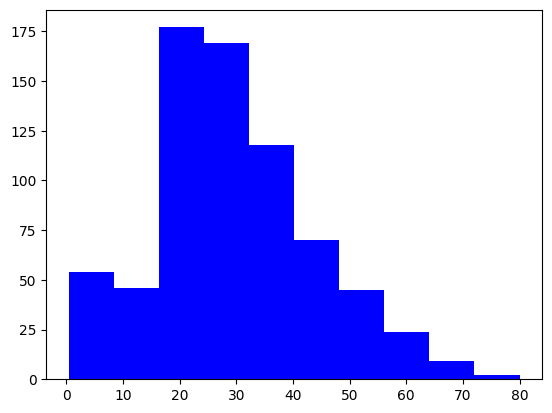

In [14]:
plt.hist(train_df['Age'], bins=10, color=['blue'])
plt.show()

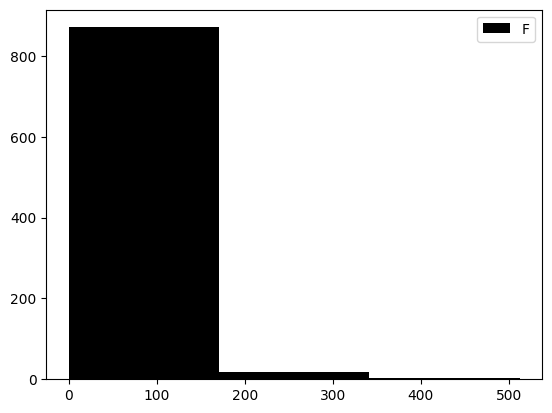

In [20]:
plt.hist(train_df['Fare'], bins=3,color='black')
plt.legend('Fare')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

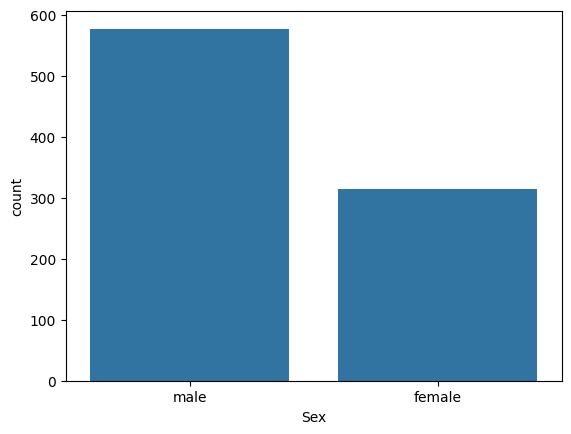

In [23]:
sns.countplot(train_df, x=train_df['Sex'])


<Axes: xlabel='Pclass', ylabel='count'>

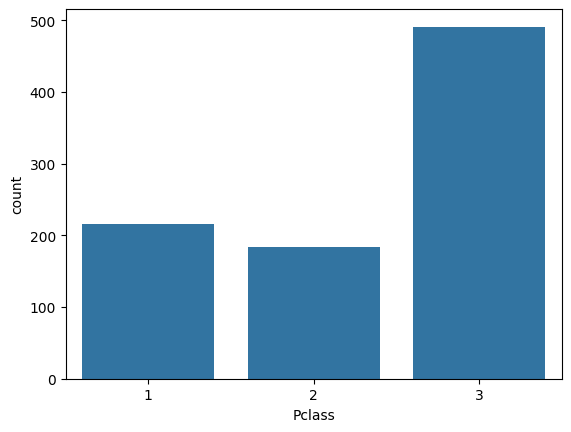

In [24]:
sns.countplot(train_df,x=train_df['Pclass'])

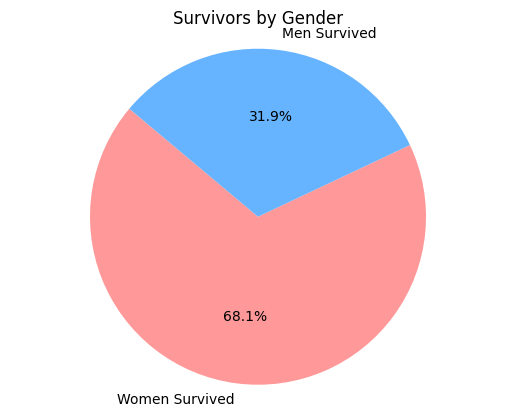

In [31]:
women = train_df.loc[train_df.Sex=='female']["Survived"]
rate_women = sum(women)/len(women)

men = train_df.loc[train_df.Sex=='male']['Survived']
rate_men = sum(men)/len(men)

labels = ['Women Survived','Men Survived']
values = [sum(women), sum(men)]
colours = ['#ff9999', '#66b3ff']

plt.pie(values, labels=labels, colors=colours, autopct='%1.1f%%', startangle=140)
plt.title("Survivors by Gender")
plt.axis('equal')
plt.show()

In [32]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

In [35]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [40]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [42]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [43]:
train_df['Port'] = train_df['Cabin'].str[0]
test_df['Port'] = test_df['Cabin'].str[0]
train_df['Port'].fillna('U',inplace=True)
test_df['Port'].fillna('U',inplace=True)

In [44]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [45]:
features_encode =['Sex','Embarked','Name','Port']
for feature in features_encode:
    le = LabelEncoder()
    le.fit(pd.concat([train_df[feature], test_df[feature]]))
    train_df[feature] = le.transform(train_df[feature])
    test_df[feature] = le.transform(test_df[feature])

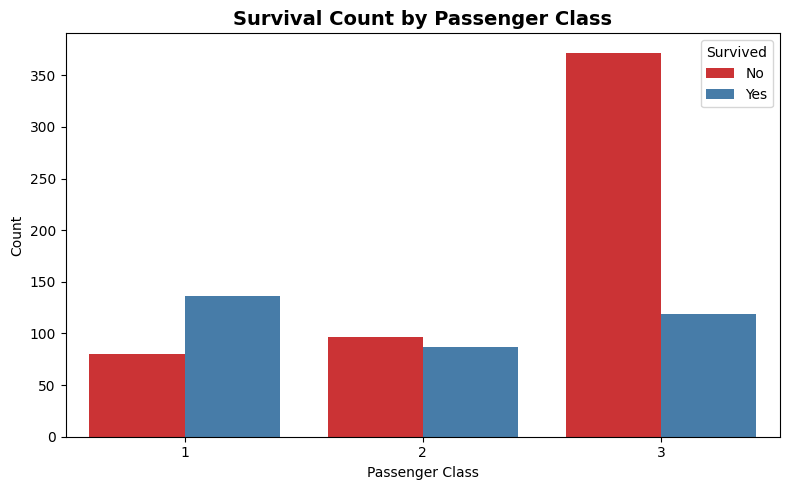

<Figure size 640x480 with 0 Axes>

In [86]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival Count by Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No','Yes'])
plt.tight_layout()
plt.show()
plt.savefig("Survival_PClass.png")

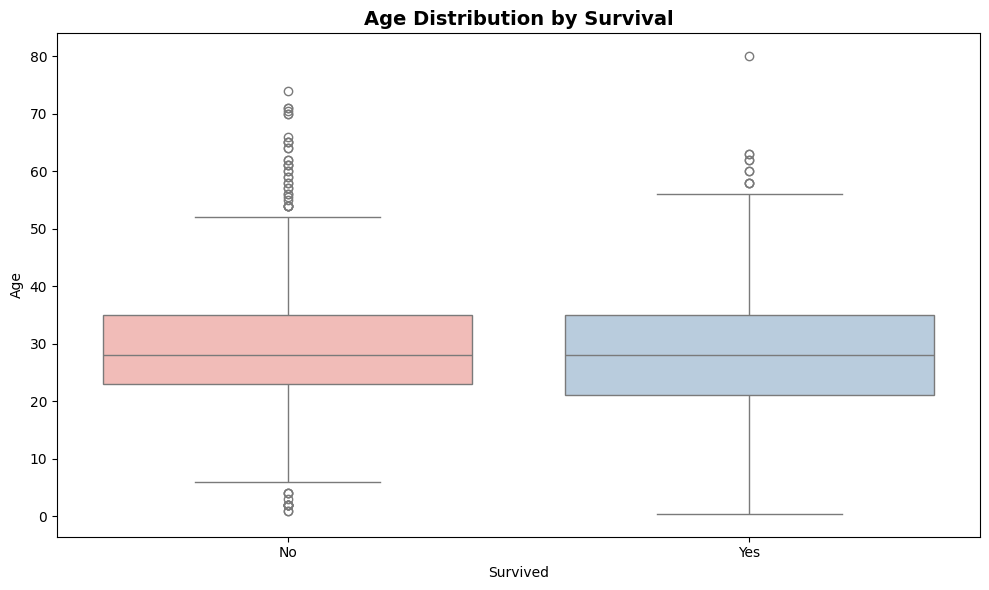

<Figure size 640x480 with 0 Axes>

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_df, x='Survived',y='Age', palette='Pastel1')
plt.title('Age Distribution by Survival', fontsize=14, fontweight='bold')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1],['No','Yes'])
plt.tight_layout()
plt.show()
plt.savefig('AgewiseSurvial.png')

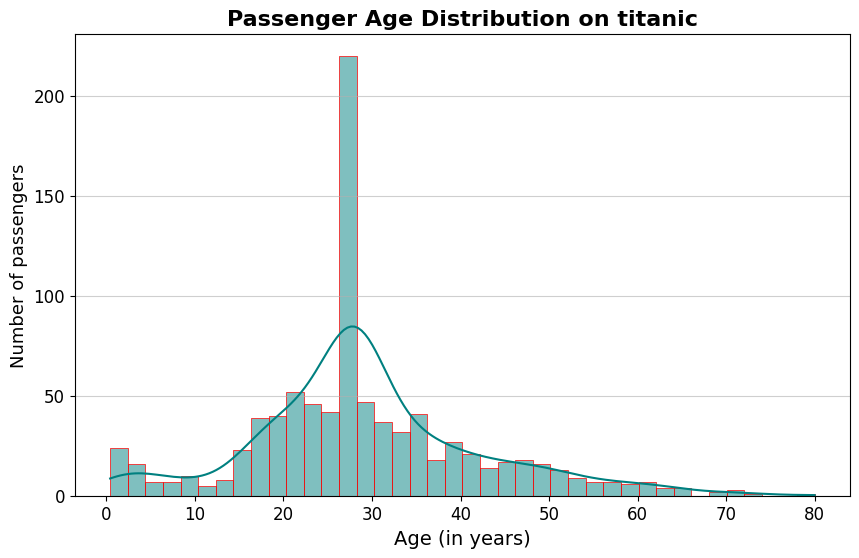

<Figure size 640x480 with 0 Axes>

In [88]:
plt.figure(figsize=(10,6))
sns.histplot(
    train_df['Age'],
    bins=40,
    kde=True,
    color='teal',
    edgecolor='red',
    linewidth=0.5
)

plt.title('Passenger Age Distribution on titanic', fontsize=16, fontweight='bold')
plt.xlabel('Age (in years)', fontsize=14)
plt.ylabel('Number of passengers', fontsize=13)
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
plt.savefig('AgeDist.png')


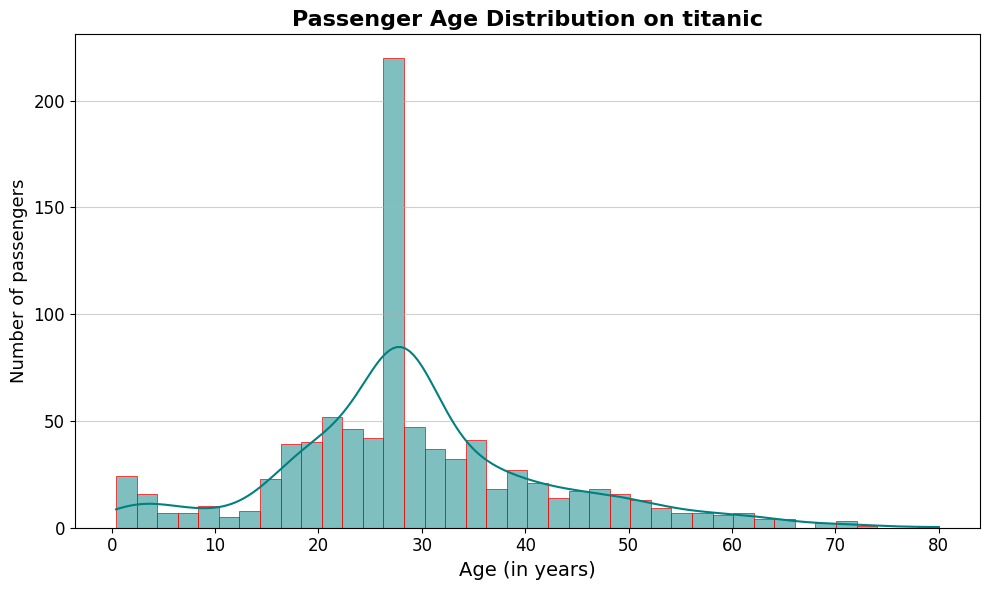

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(
    train_df['Age'],
    bins=40,
    kde=True,
    color='teal',
    edgecolor='red',
    linewidth=0.5
)

plt.title('Passenger Age Distribution on titanic', fontsize=16, fontweight='bold')
plt.xlabel('Age (in years)', fontsize=14)
plt.ylabel('Number of passengers', fontsize=13)
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


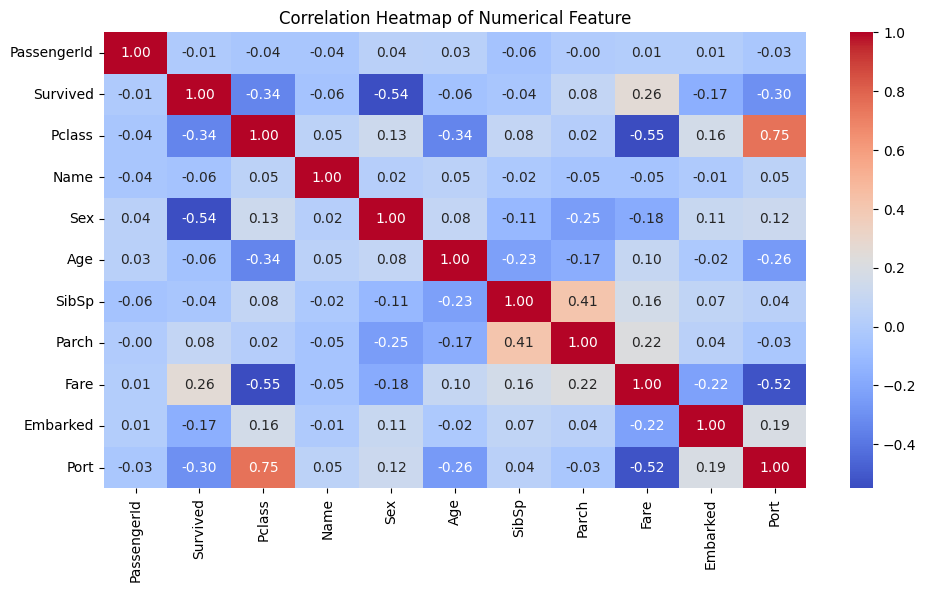

<Figure size 640x480 with 0 Axes>

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Feature")
plt.tight_layout(pad=True)
plt.show()
plt.savefig('Num_Heatmap.png')

In [63]:
models={
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_endocer=False, eval_metric='mlogloss', random_state=42)
}

In [64]:
features =['Pclass','Sex','Age','Fare','Embarked']
X = train_df[features]
y = train_df['Survived']
X_test_final = test_df[features]
test_passenger_ids = test_df['PassengerId']

In [70]:
predictions = {}
cv_scores = []
for name, model in models.items():
    model.fit(X, y)
    preds = model.predict(X_test_final)
    predictions[name] = preds
    cv_score = cross_val_score(model, X, y, cv=5)
    cv_scores.append({'Model':name, 'CV Accuracy':cv_score.mean()})
    print(f"{name} CV Accuracy: {cv_score.mean():.4f}")

Logistic Regression CV Accuracy: 0.7823
Random Forest CV Accuracy: 0.8104
Gradient Boosting CV Accuracy: 0.8216
XGBoost CV Accuracy: 0.8081


In [71]:
print(cv_scores)
cv_df = pd.DataFrame(cv_scores)


[{'Model': 'Logistic Regression', 'CV Accuracy': np.float64(0.7822672776348)}, {'Model': 'Random Forest', 'CV Accuracy': np.float64(0.8103571652752496)}, {'Model': 'Gradient Boosting', 'CV Accuracy': np.float64(0.8215742891218379)}, {'Model': 'XGBoost', 'CV Accuracy': np.float64(0.8081036971941498)}]


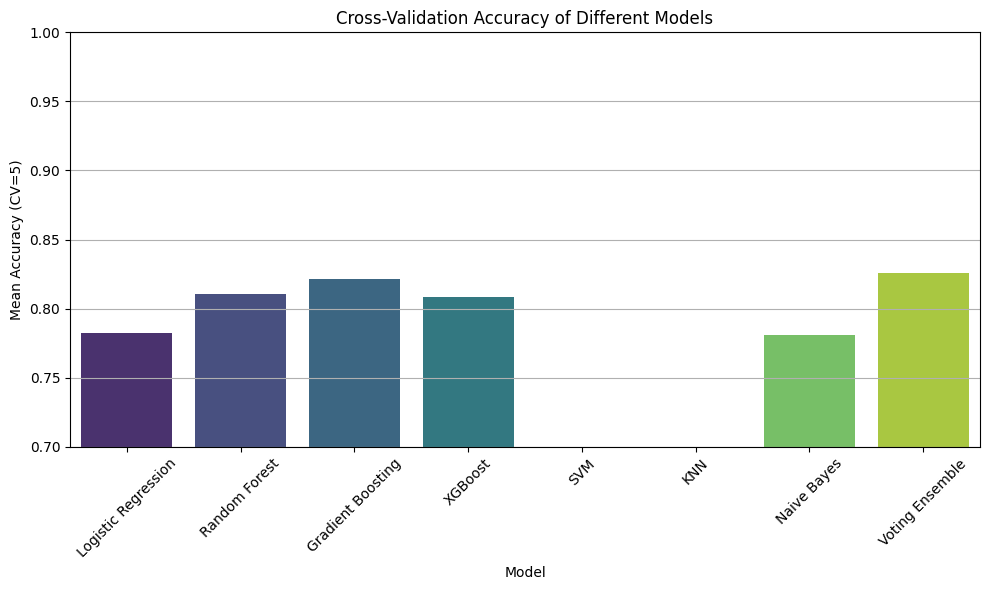

<Figure size 640x480 with 0 Axes>

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cv_df, x='Model', y='CV Accuracy', palette='viridis')
plt.title('Cross-Validation Accuracy of Different Models')
plt.ylabel('Mean Accuracy (CV=5)')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('CV_Models.png')

In [73]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [75]:
models.update({
    'SVM': SVC(probability=True, random_state=42),
    'KNN' : KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
})

In [76]:
cv_scores = []
predictions ={}

for name, model in models.items():
    model.fit(X, y)
    preds = model.predict(X_test_final)
    predictions[name] = preds
    score = cross_val_score(model, X, y, cv=5).mean()
    cv_scores.append({'Model':name, 'CV Accuracy': score})
    print(f"{name}: {score:.4f}")

Logistic Regression: 0.7823
Random Forest: 0.8104
Gradient Boosting: 0.8216
XGBoost: 0.8081
SVM: 0.6724
KNN: 0.6858
Naive Bayes: 0.7812


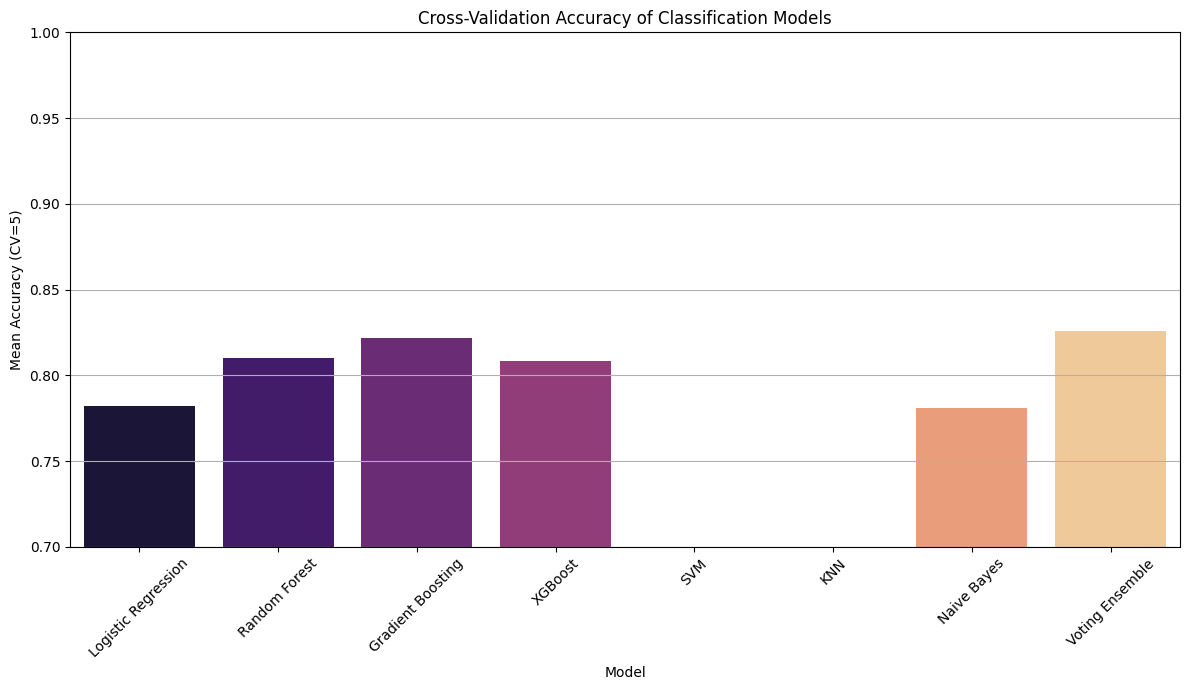

<Figure size 640x480 with 0 Axes>

In [92]:
cv_df = pd.DataFrame(cv_scores)
plt.figure(figsize=(12,7))
sns.barplot(data=cv_df, x='Model',y='CV Accuracy', palette='magma')
plt.title('Cross-Validation Accuracy of Classification Models')
plt.ylabel('Mean Accuracy (CV=5)')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('Classification_CV.png')

In [80]:
from sklearn.ensemble import VotingClassifier

In [81]:
voting_clf = VotingClassifier(
    estimators=[
        ('gb', models['Gradient Boosting']),
        ('rf', models['Random Forest']),
        ('xgb', models['XGBoost']),
    ],
    voting='soft'
)

In [83]:
voting_clf.fit(X,y)
ensemble_preds = voting_clf.predict(X_test_final)
ensemble_cv_score = cross_val_score(voting_clf,X,y,cv=5).mean()
print(f"Voting Ensemble CV Accuracy: {ensemble_cv_score:.4f}")


Voting Ensemble CV Accuracy: 0.8261


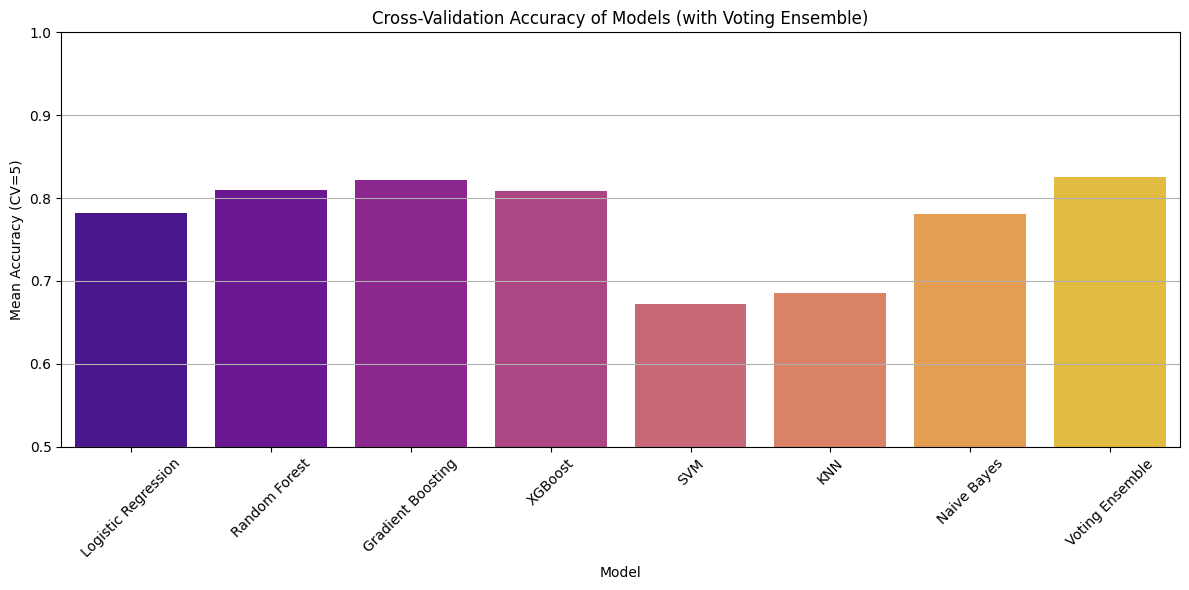

<Figure size 640x480 with 0 Axes>

In [93]:
predictions['Voting Ensemble'] = ensemble_preds
cv_scores.append({'Model': 'Voting Ensemble', 'CV Accuracy': ensemble_cv_score})
cv_df = pd.DataFrame(cv_scores)
plt.figure(figsize=(12, 6))
sns.barplot(data=cv_df, x='Model', y='CV Accuracy', palette='plasma')
plt.title('Cross-Validation Accuracy of Models (with Voting Ensemble)')
plt.ylabel('Mean Accuracy (CV=5)')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('CV_withVoting.png')
